# MA770 Mathematical and Statistical Methods of Bioinformatics
# Problem Set 9.2, 9.3 & 10.1
### Cheng, Wanli U31865818

# Golub Dataset
# Support Vector Machine & $k$-Nearest Neighbour

In [453]:
# Load modules we'll need.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

## 9.2 ML on Golub datasets

### Prepare the Dataset

In [454]:
# Import the Golub datasets

Tr = open('GolubTr.txt', 'r')
Train = Tr.read()
GolubTrain=Train.split()

Te = open('GolubTe.txt', 'r')
Test = Te.read()
GolubTest=Test.split()

In [455]:
# Generate the whole data set

def Para(s):
    if s[:3]=='ALL':
        return 1
    elif s[:3]=='AML':
        return -1
    else:
        return False

def Y(D1,D2):
    Y=np.zeros(72)
    for m in range(72):
        if m <38:
            Y[m]=Y[m]+Para(D1[3+m])
        else:
            Y[m]=Y[m]+Para(D2[3+m-38])
    return Y

def X(D1,D2):
    X=np.zeros((72,7129))
    for m in range(72):
        if m <38:
            for n in range(7129):
                X[m,n]=X[m,n]+int(D1[42+m+39*n])
        else:
            for n in range(7129):
                X[m,n]=X[m,n]+int(D2[m+35*n])
    return X

In [456]:
# Separate and Normalize the data sets
XData=X(GolubTrain,GolubTest)/1000
YData=Y(GolubTrain,GolubTest)

### Divide The Training set and Test set

Since the data set is sparse, it is very easy to have overfitting.

By experiment the different division of training and test set, we find that a ratio of $36:36$ is optimal.

In [457]:
# Separate the Training Set and the Testing Set

def Comp(L1,L2):
    for a in L2:
        L1=np.delete(L1,np.where(L1==a))
    return L1

def TrTe(k,X,Y):
    D = np.empty(4, dtype=object)
    (M,N) = np.shape(X)
    SampleTr=np.sort(np.random.choice(M, k, replace=False))
    SampleTe=Comp(np.arange(M),SampleTr)
    XTr=np.zeros((k,N))
    XTe=np.zeros((M-k,N))
    YTr=np.zeros(k)
    YTe=np.zeros(M-k)
    for n in np.arange(M):
        if n in np.arange(k):
            XTr[n]=XTr[n]+X[SampleTr[n]]
            YTr[n]=YTr[n]+Y[SampleTr[n]]
        else:
            XTe[n-k]=XTe[n-k]+X[SampleTe[n-k]]
            YTe[n-k]=YTe[n-k]+Y[SampleTe[n-k]]
    D[0]=XTr
    D[1]=YTr
    D[2]=XTe
    D[3]=YTe
    return D

In [458]:
# Construct a particular example of Training and Testing sets
XTrain=TrTe(36,XData,YData)[0]
YTrain=TrTe(36,XData,YData)[1]
XTest=TrTe(36,XData,YData)[2]
YTest=TrTe(36,XData,YData)[3]

### Measures of the Performance

In [459]:
def Accuracy(X,Y,classifier):
    (M,N)=np.shape(X)
    TP=0
    TN=0
    for m in np.arange(M):
        if Y[m]==1 and classifier.predict(X)[m]==1:
            TP=TP+1
        if Y[m]==-1 and classifier.predict(X)[m]==-1:
            TN=TN+1
    return (TP+TN)/M

def PPV(X,Y,classifier):
    (M,N)=np.shape(X)
    TP=0
    FP=0
    for m in np.arange(M):
        if Y[m]==1 and classifier.predict(X)[m]==1:
            TP=TP+1
        if Y[m]==-1 and classifier.predict(X)[m]==1:
            FP=FP+1
    return TP/(TP+FP)

def Sens(X,Y,classifier):
    (M,N)=np.shape(X)
    TP=0
    FN=0
    for m in np.arange(M):
        if Y[m]==1 and classifier.predict(X)[m]==1:
            TP=TP+1
        if Y[m]==1 and classifier.predict(X)[m]==-1:
            FN=FN+1
    return TP/(TP+FN)


def CfM(X,Y,classifier):
    TP=0
    FP=0
    TN=0
    FN=0
    (M,N)=np.shape(X)
    for m in range(M):
        if classifier.predict(X)[m] == Y[m]:
            if classifier.predict(X)[m] == 1:
                TP=TP+1
            else:
                TN=TN+1
        else:
            if classifier.predict(X)[m] == 1:
                FP=FP+1
            else:
                FN=FN+1
    return np.array([[TP,FP],[TN,FN]])

### Support Vector Machines

#### Train the SVM

In [460]:
ModelLinear= svm.SVC(C=1.0,kernel='linear')
ModelLinear.fit(XTrain,YTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Test the SVM

In [461]:
Accuracy(XTest,YTest,ModelLinear)

0.75

### $k$-Nearest Neighbors

We tried different $k$ values for the $k$NN algorithm. However, we can't observe any explicit pattern between the parameter $k$ and the performance of the model. Since we've tried different division of the dataset, sometiems the performance increase with $k$ increase, sometimes vice versa. In many cases, the change is monotonic, but in general, it is not(we've observed soem counter example).

In [462]:
kNN1 = KNeighborsClassifier(n_neighbors=1)
kNN1.fit(XTrain,YTrain)
kNN5 = KNeighborsClassifier(n_neighbors=5)
kNN5.fit(XTrain,YTrain)
kNN10 = KNeighborsClassifier(n_neighbors=10)
kNN10.fit(XTrain,YTrain)
kNN15 = KNeighborsClassifier(n_neighbors=15)
kNN15.fit(XTrain,YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

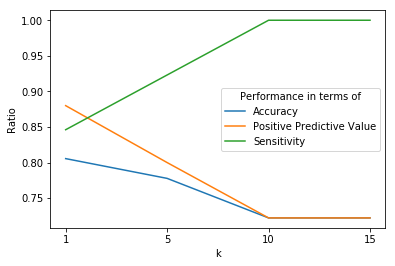

In [463]:
AMods=[Accuracy(XTest,YTest,kNN1),Accuracy(XTest,YTest,kNN5),Accuracy(XTest,YTest,kNN10),Accuracy(XTest,YTest,kNN15)]
PMods=[PPV(XTest,YTest,kNN1),PPV(XTest,YTest,kNN5),PPV(XTest,YTest,kNN10),PPV(XTest,YTest,kNN15)]
SMods=[Sens(XTest,YTest,kNN1),Sens(XTest,YTest,kNN5),Sens(XTest,YTest,kNN10),Sens(XTest,YTest,kNN15)]
LabRed=['1','5','10','15']
plt.plot(LabRed,AMods,label='Accuracy')
plt.plot(LabRed,PMods,label='Positive Predictive Value')
plt.plot(LabRed,SMods,label='Sensitivity')
plt.xlabel('k')
plt.ylabel('Ratio');
plt.legend(title='Performance in terms of')

## 9.3 & 10.1 More on SVM

### (a) Choice of Kernels

Here we studies the behaviors of SVMs with nonlinear kernels.

#### Polynomial Kernels

Here we study how does the performance of the model change against the degree of the polynomial kernel.

In [464]:
ModelPoly2= svm.SVC(degree=2,gamma='scale',kernel='poly')
ModelPoly2.fit(XTrain,YTrain)

ModelPoly3= svm.SVC(degree=3,gamma='scale',kernel='poly')
ModelPoly3.fit(XTrain,YTrain)

ModelPoly4= svm.SVC(degree=4,gamma='scale',kernel='poly')
ModelPoly4.fit(XTrain,YTrain)

ModelPoly5= svm.SVC(degree=5,gamma='scale',kernel='poly')
ModelPoly5.fit(XTrain,YTrain)

ModelPoly100= svm.SVC(degree=100,gamma='scale',kernel='poly')
ModelPoly100.fit(XTrain,YTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=100, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In the following graph, the performance of SVM model with different polynomial(including linear) kernels is plot against with their degree.

The particular configurations of the graph rely on the division of training set and test set. Hence we tried different divisions, and some general patterns are observed:

1. In most cases, the perforamce of linear model and quadratic model have a big gap (compare with other models).
2. In most cases, the accuracy sequence of degree $n$ polynomial models is monotonic and converges.

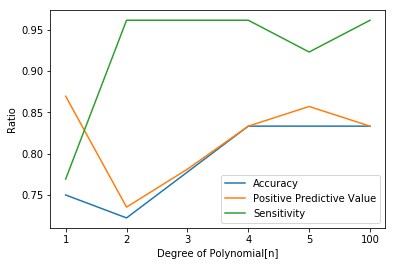

In [465]:
AMods=[Accuracy(XTest,YTest,ModelLinear),Accuracy(XTest,YTest,ModelPoly2),Accuracy(XTest,YTest,ModelPoly3),Accuracy(XTest,YTest,ModelPoly4),Accuracy(XTest,YTest,ModelPoly5),Accuracy(XTest,YTest,ModelPoly100)]
PMods=[PPV(XTest,YTest,ModelLinear),PPV(XTest,YTest,ModelPoly2),PPV(XTest,YTest,ModelPoly3),PPV(XTest,YTest,ModelPoly4),PPV(XTest,YTest,ModelPoly5),PPV(XTest,YTest,ModelPoly100)]
SMods=[Sens(XTest,YTest,ModelLinear),Sens(XTest,YTest,ModelPoly2),Sens(XTest,YTest,ModelPoly3),Sens(XTest,YTest,ModelPoly4),Sens(XTest,YTest,ModelPoly5),Sens(XTest,YTest,ModelPoly100)]
LabRed=['1','2','3','4','5','100']
plt.plot(LabRed,AMods,label='Accuracy')
plt.plot(LabRed,PMods,label='Positive Predictive Value')
plt.plot(LabRed,SMods,label='Sensitivity')
plt.xlabel('Degree of Polynomial[n]')
plt.ylabel('Ratio');
plt.legend()

#### Normalized Gaussian Kernels

In the package we used, rbf kernel denote the Gaussian kernel without normalization.
Here, we normalize it and only consider its performance under different standard deviations.

In [466]:
sigma1=0.001
c1=1/(np.sqrt(2*np.pi*sigma1)**72)
ModelNormalized1= svm.SVC(C=c1,gamma=sigma1,kernel='rbf')
ModelNormalized1.fit(XTrain,YTrain)

sigma2=0.01
c2=1/(np.sqrt(2*np.pi*sigma2)**72)
ModelNormalized2= svm.SVC(C=c2,gamma=sigma2,kernel='rbf')
ModelNormalized2.fit(XTrain,YTrain)

sigma3=0.1
c3=1/(np.sqrt(2*np.pi*sigma3)**72)
ModelNormalized3= svm.SVC(C=c3,gamma=sigma3,kernel='rbf')
ModelNormalized3.fit(XTrain,YTrain)

sigma4=1.0
c4=1/(np.sqrt(2*np.pi*sigma4)**72)
ModelNormalized4= svm.SVC(C=c4,gamma=sigma4,kernel='rbf')
ModelNormalized4.fit(XTrain,YTrain)

sigma5=10.0
c5=1/(np.sqrt(2*np.pi*sigma5)**72)
ModelNormalized5= svm.SVC(C=c5,gamma=sigma5,kernel='rbf')
ModelNormalized5.fit(XTrain,YTrain)

sigma6=100.0
c6=1/(np.sqrt(2*np.pi*sigma6)**72)
ModelNormalized6= svm.SVC(C=c6,gamma=sigma6,kernel='rbf')
ModelNormalized6.fit(XTrain,YTrain)

SVC(C=1.8429974703058357e-101, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In the following graph, the performance of SVM model with normalized Gaussian kernels is plot against with their standard deviations.

The particular configurations of the graph rely on the division of training set and test set. Hence we tried different divisions, and some general patterns are observed:

1. In most cases, there would be a gap between sd=0.1 and sd=1.
2. In most cases, smaller standard value have better performance.

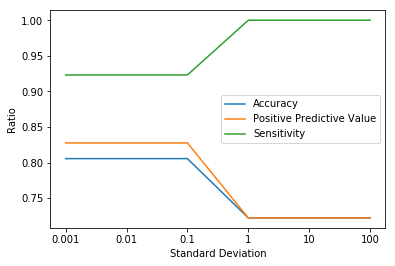

In [467]:
AMods=[Accuracy(XTest,YTest,ModelNormalized1),Accuracy(XTest,YTest,ModelNormalized2),Accuracy(XTest,YTest,ModelNormalized3),Accuracy(XTest,YTest,ModelNormalized4),Accuracy(XTest,YTest,ModelNormalized5),Accuracy(XTest,YTest,ModelNormalized6)]
PMods=[PPV(XTest,YTest,ModelNormalized1),PPV(XTest,YTest,ModelNormalized2),PPV(XTest,YTest,ModelNormalized3),PPV(XTest,YTest,ModelNormalized4),PPV(XTest,YTest,ModelNormalized5),PPV(XTest,YTest,ModelNormalized6)]
SMods=[Sens(XTest,YTest,ModelNormalized1),Sens(XTest,YTest,ModelNormalized2),Sens(XTest,YTest,ModelNormalized3),Sens(XTest,YTest,ModelNormalized4),Sens(XTest,YTest,ModelNormalized5),Sens(XTest,YTest,ModelNormalized6)]
LabRed=['0.001','0.01','0.1','1','10','100']
plt.plot(LabRed,AMods,label='Accuracy')
plt.plot(LabRed,PMods,label='Positive Predictive Value')
plt.plot(LabRed,SMods,label='Sensitivity')
plt.xlabel('Standard Deviation')
plt.ylabel('Ratio');
plt.legend()

#### Compare Polynomial, Gaussian and Sigmoid Kernel

In [468]:
ModelSig= svm.SVC(gamma='scale',kernel='sigmoid')
ModelSig.fit(XTrain,YTrain)

ModelGauss= svm.SVC(gamma='scale',kernel='rbf')
ModelGauss.fit(XTrain,YTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

For Golub dataset, we can observe that:
1. Linear kernel always have a high accuracy
2. Normalized Gaussian kernel have a high accuracy (sometimes higher than linear kernel) for sdandard deviation smaller than 0.1.
3. Polynomial Kernels sometimes could have a high accuracy, but with very high degree, which implies overfit.
4. In general, linear kernels have higher accuracy than polynomial kernels with small $n$ (i.e., the degree of the polynomial).
5. Sigmoid Kernel have very low accuracy in most cases.

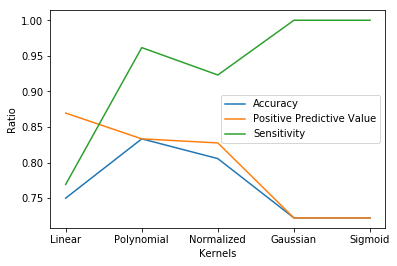

In [469]:
AMods=[Accuracy(XTest,YTest,ModelLinear),Accuracy(XTest,YTest,ModelPoly100),Accuracy(XTest,YTest,ModelNormalized1),Accuracy(XTest,YTest,ModelGauss),Accuracy(XTest,YTest,ModelSig)]
PMods=[PPV(XTest,YTest,ModelLinear),PPV(XTest,YTest,ModelPoly100),PPV(XTest,YTest,ModelNormalized1),PPV(XTest,YTest,ModelGauss),PPV(XTest,YTest,ModelSig)]
SMods=[Sens(XTest,YTest,ModelLinear),Sens(XTest,YTest,ModelPoly100),Sens(XTest,YTest,ModelNormalized1),Sens(XTest,YTest,ModelGauss),Sens(XTest,YTest,ModelNormalized5)]
LabRed=['Linear','Polynomial','Normalized','Gaussian','Sigmoid']
plt.plot(LabRed,AMods,label='Accuracy')
plt.plot(LabRed,PMods,label='Positive Predictive Value')
plt.plot(LabRed,SMods,label='Sensitivity')
plt.xlabel('Kernels')
plt.ylabel('Ratio');
plt.legend()

### (b) Dimension reduction

Since our trained model is depend on the particular division of the training set and test set. In this section, we will keep this division fixed, and reduce the dimension of data with respect with the particular SVM model we trained under the fixed division.

#### Original Model

The following model is the SVM with linear kernel and pennalty $C=1.0$, and is trained under the data set without dimension reduction and a fixed training-test division $36:36$.

In [470]:
ModelLine= svm.SVC(kernel='linear')
ModelLine.fit(XTrain,YTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [471]:
Accuracy(XTest,YTest,ModelLine)

0.75

In [472]:
PPV(XTest,YTest,ModelLine)

0.8695652173913043

#### Reduce the Dimension of Data

In order to reduce the dimensional 

In [473]:
def Sort(Score):
    return np.argsort(-np.abs(Score))

def DimRed(Score,k,X):
    (M,N) = np.shape(X)
    Index=Sort(Score)[:k] # Find the most significant k features.
    XRedT=np.zeros((k,M))
    for n in np.arange(k):
        XRedT[n]=XRedT[n]+np.transpose(X)[Index[n]]
    XRed=np.transpose(XRedT)
    return XRed

In [474]:
XRedTr3=DimRed(ModelLine.coef_[0],1000,XTrain)
YRedTr3=YTrain
XRedTe3=DimRed(ModelLine.coef_[0],1000,XTest)
YRedTe3=YTest

XRedTr2=DimRed(ModelLine.coef_[0],100,XTrain)
YRedTr2=YTrain
XRedTe2=DimRed(ModelLine.coef_[0],100,XTest)
YRedTe2=YTest

XRedTr1=DimRed(ModelLine.coef_[0],10,XTrain)
YRedTr1=YTrain
XRedTe1=DimRed(ModelLine.coef_[0],10,XTest)
YRedTe1=YTest

XRedTr0=DimRed(ModelLine.coef_[0],1,XTrain)
YRedTr0=YTrain
XRedTe0=DimRed(ModelLine.coef_[0],1,XTest)
YRedTe0=YTest

#### Train the Models

In [475]:
ModelLineRed3= svm.SVC(kernel='linear')
ModelLineRed3.fit(XRedTr3,YRedTr3)

ModelLineRed2= svm.SVC(kernel='linear')
ModelLineRed2.fit(XRedTr2,YRedTr2)

ModelLineRed1= svm.SVC(kernel='linear')
ModelLineRed1.fit(XRedTr1,YRedTr1)

ModelLineRed0= svm.SVC(kernel='linear')
ModelLineRed0.fit(XRedTr0,YRedTr0)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Test the Models

#### Compare the Performance of each model with respect to the features they used.

In the following graph, the performance of SVM model with linear kernels is plot against with the number of top features it takes. 

The particular configurations of the graph rely on the division of training set and test set. Hence we tried different divisions, and some general patterns are observed:

1. In most cases, the model with top 1000 features and the original model(7192 features) have the same or very similar performance.
3. In general, the relationship between number of features and accuracy is not monotonic.
2. In particular, model trained with less features could have even better performance then original model(7192 features).

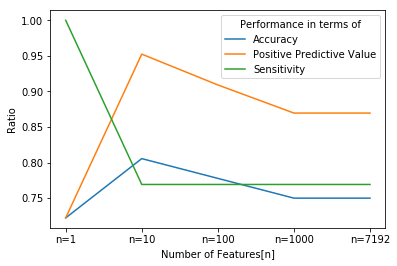

In [476]:
ARed=[Accuracy(XRedTe0,YRedTe0,ModelLineRed0),Accuracy(XRedTe1,YRedTe1,ModelLineRed1),Accuracy(XRedTe2,YRedTe2,ModelLineRed2),Accuracy(XRedTe3,YRedTe3,ModelLineRed3),Accuracy(XTest,YTest,ModelLine)]
PRed=[PPV(XRedTe0,YRedTe0,ModelLineRed0),PPV(XRedTe1,YRedTe1,ModelLineRed1),PPV(XRedTe2,YRedTe2,ModelLineRed2),PPV(XRedTe3,YRedTe3,ModelLineRed3),PPV(XTest,YTest,ModelLine)]
SRed=[Sens(XRedTe0,YRedTe0,ModelLineRed0),Sens(XRedTe1,YRedTe1,ModelLineRed1),Sens(XRedTe2,YRedTe2,ModelLineRed2),Sens(XRedTe3,YRedTe3,ModelLineRed3),Sens(XTest,YTest,ModelLine)]
LabRed=['n=1','n=10','n=100','n=1000','n=7192']
plt.plot(LabRed,ARed,label='Accuracy')
plt.plot(LabRed,PRed,label='Positive Predictive Value')
plt.plot(LabRed,SRed,label='Sensitivity')
plt.xlabel('Number of Features[n]')
plt.ylabel('Ratio');
plt.legend(title='Performance in terms of')

### (c) Dimension Reduction with Fisher criterion score

The *Fisher criterion score* of a gene $g_j$ is given by:
$$
F(g_j)=\frac{(\mu_j^+-\mu_j^-)^2}{(\sigma_j^+)^2+(\sigma_j^-)^2}
$$
for $\mu_j^\pm$ the mean score of the features in class $y_j=\pm$, and $\sigma_j^\pm$ the standard deviation of features in class $y_j=\pm$.

In [477]:
def mu(X,Y,a):
    (M,N) = np.shape(X)
    Sx=np.zeros(N)
    Nx=0
    for m in np.arange(M):
        if Y[m]==a:
            Sx=Sx+X[m]
            Nx=Nx+1
    return Sx/Nx

def sigma(X,Y,a):
    return np.sqrt(mu((X-mu(X,Y,a))**2,Y,a))

def Fisher(X,Y):
    return (mu(X,Y,1)-mu(X,Y,-1))**2/((sigma(X,Y,1)**2)+(sigma(X,Y,-1)**2))

In [478]:
XRedFTr3=DimRed(Fisher(XTrain,YTrain),1000,XTrain)
YRedFTr3=YTrain
XRedFTe3=DimRed(Fisher(XTrain,YTrain),1000,XTest)
YRedFTe3=YTest

XRedFTr2=DimRed(Fisher(XTrain,YTrain),100,XTrain)
YRedFTr2=YTrain
XRedFTe2=DimRed(Fisher(XTrain,YTrain),100,XTest)
YRedFTe2=YTest

XRedFTr1=DimRed(Fisher(XTrain,YTrain),10,XTrain)
YRedFTr1=YTrain
XRedFTe1=DimRed(Fisher(XTrain,YTrain),10,XTest)
YRedFTe1=YTest

XRedFTr0=DimRed(Fisher(XTrain,YTrain),1,XTrain)
YRedFTr0=YTrain
XRedFTe0=DimRed(Fisher(XTrain,YTrain),1,XTest)
YRedFTe0=YTest

**SVM**

In [479]:
ModelLineRedF3= svm.SVC(kernel='linear')
ModelLineRedF3.fit(XRedFTr3,YRedFTr3)

ModelLineRedF2= svm.SVC(kernel='linear')
ModelLineRedF2.fit(XRedFTr2,YRedFTr2)

ModelLineRedF1= svm.SVC(kernel='linear')
ModelLineRedF1.fit(XRedFTr1,YRedFTr1)

ModelLineRedF0= svm.SVC(kernel='linear')
ModelLineRedF0.fit(XRedFTr0,YRedFTr0)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

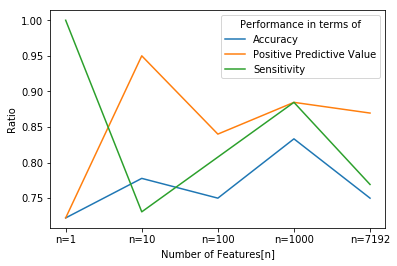

In [480]:
ARed=[Accuracy(XRedFTe0,YRedFTe0,ModelLineRedF0),Accuracy(XRedFTe1,YRedFTe1,ModelLineRedF1),Accuracy(XRedFTe2,YRedFTe2,ModelLineRedF2),Accuracy(XRedFTe3,YRedFTe3,ModelLineRedF3),Accuracy(XTest,YTest,ModelLine)]
PRed=[PPV(XRedFTe0,YRedFTe0,ModelLineRedF0),PPV(XRedFTe1,YRedFTe1,ModelLineRedF1),PPV(XRedFTe2,YRedFTe2,ModelLineRedF2),PPV(XRedFTe3,YRedFTe3,ModelLineRedF3),PPV(XTest,YTest,ModelLine)]
SRed=[Sens(XRedFTe0,YRedFTe0,ModelLineRedF0),Sens(XRedFTe1,YRedFTe1,ModelLineRedF1),Sens(XRedFTe2,YRedFTe2,ModelLineRedF2),Sens(XRedFTe3,YRedFTe3,ModelLineRedF3),Sens(XTest,YTest,ModelLine)]
LabRed=['n=1','n=10','n=100','n=1000','n=7192']
plt.plot(LabRed,ARed,label='Accuracy')
plt.plot(LabRed,PRed,label='Positive Predictive Value')
plt.plot(LabRed,SRed,label='Sensitivity')
plt.xlabel('Number of Features[n]')
plt.ylabel('Ratio');
plt.legend(title='Performance in terms of')

**$k$NN**

In [481]:
ModelLineRedF3= svm.SVC(kernel='linear')
ModelLineRedF3.fit(XRedFTr3,YRedFTr3)

ModelLineRedF2= svm.SVC(kernel='linear')
ModelLineRedF2.fit(XRedFTr2,YRedFTr2)

ModelLineRedF1= svm.SVC(kernel='linear')
ModelLineRedF1.fit(XRedFTr1,YRedFTr1)

ModelLineRedF0= svm.SVC(kernel='linear')
ModelLineRedF0.fit(XRedFTr0,YRedFTr0)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### (d) Other Kernels

We've already tried and discussed the choices of kernels, see part (b).

### (e) Normalize the Features

Now, we apply a method that normalize each feature vector to length one in Euclidean norm. However, compared with the naive normalization done by "X/1000", this normalization does not give a better performance in both SVM and $k$NN.

In [482]:
def Normal(X):
    (M,N)=np.shape(X)
    NX=np.zeros((M,N))
    for m in np.arange(M):
        NX[m]=NX[m]+X[m]/np.linalg.norm(X[m],2)
    return NX

**SVM**

In [498]:
NModelLine= svm.SVC(kernel='linear')
NModelLine.fit(Normal(XTrain),YTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [499]:
Accuracy(Normal(XTest),YTest,NModelLine)

0.7222222222222222

In [500]:
Accuracy(XTest,YTest,NModelLine)

0.7777777777777778

In [501]:
Accuracy(XTest,YTest,ModelLine)

0.75

**$k$NN**

In [502]:
NkNN1=KNeighborsClassifier(n_neighbors=1)
NkNN1.fit(Normal(XTrain),YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [503]:
Accuracy(Normal(XTest),YTest,NkNN1)

0.7777777777777778

In [504]:
Accuracy(XTest,YTest,NkNN1)

0.7777777777777778

In [505]:
Accuracy(XTest,YTest,kNN1)

0.8055555555555556

### (f) Confusion Matrix

**SVM**

In [506]:
CfM(XTest,YTest,ModelLine)

array([[20,  3],
       [ 7,  6]])

In [507]:
CfM(XTest,YTest,ModelPoly4)

array([[25,  5],
       [ 5,  1]])

In [508]:
CfM(XTest,YTest,ModelNormalized1)

array([[24,  5],
       [ 5,  2]])

**$k$NN**

In [509]:
CfM(XTest,YTest,kNN1)

array([[22,  3],
       [ 7,  4]])

In [510]:
CfM(XTest,YTest,kNN5)

array([[24,  6],
       [ 4,  2]])

In [511]:
CfM(XTest,YTest,kNN10)

array([[26, 10],
       [ 0,  0]])

### (g) ROC Curve for SVM

In [338]:
def TPR_SVM(Model,X,Y,b):
    Model.intercept_=b
    TP=CfM(X,Y,Model)[(0,0)]
    FN=CfM(X,Y,Model)[(1,1)]
    return TP/(TP+FN)

def FPR_SVM(Model,X,Y,b):
    Model.intercept_=b
    FP=CfM(X,Y,Model)[(0,1)]
    TN=CfM(X,Y,Model)[(1,0)]
    return FP/(FP+TN)

def roc_SVM(Model,X,Y,Timestep):
    n=np.size(Timestep)
    roc=np.zeros((n,2))
    for t in np.arange(n):
        roc[t]=roc[t]+[TPR(Model,X,Y,Timestep[t]),FPR(Model,X,Y,Timestep[t])]
    return roc

def roc_score(roc):
    (M,N)=np.shape(roc)
    rocL
    score=0
    for m in np.arange(M-1):
        score=score+(roc[(m+1,0)]+roc[(m,0)])*(roc[(m+1,1)]-roc[(m,1)])/2
    return score

In [323]:
ModelL=svm.LinearSVC(tol=0.1,C=0.5,fit_intercept=True)
ModelL.fit(XTrain,YTrain)

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.1,
          verbose=0)

In [339]:
timestep = (np.arange(400)-200)/100
rocL=roc_SVM(ModelL,XTest,YTest,timestep)

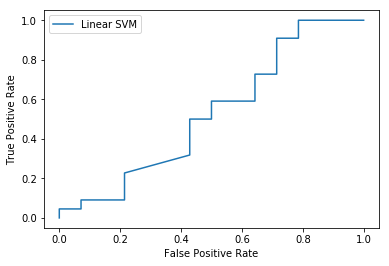

In [340]:
plt.plot(np.transpose(rocL)[1],np.transpose(rocL)[0],label='Linear SVM')
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend()

In [341]:
roc_score(rocL)

0.525974025974026

In [497]:
29/34

0.8529411764705882

### (h) Conclusion for SVM

**Choice of Kernel**
In the experiments above, we can see that linear, polynomial and normalized Gaussian kernels have relatively good performance on Golub dataset, while sigmoid always have a poor performance. In different initialization of the training and test sets, the kernels have very different performance. In most case, linear kernel and normalized Gaussian kernel have good performance in terms of accuracy and positive predictive value. But the performance of polynomial kernel is tricky, sometimes it may give very low test accuracy, which may be considered as an overfitting.

**Feature Elimination**
There are 7129 features in Golub dataset in total. In our experiments, either by norm of the vectors that span the hyperplane or the Fisher criterion score, reduce to 1000 features could give a very good performance. And reduce to 100 score may have an acceptable (but not very good) performance.

**Compare with Golub's result**
Golub et al claimes their prediction on test set of 34 data points is 100% accurate on 29 ones with 50 features. Here we may interprate it as 0.85 accuracy. In our test, we cannot always get such a high accuracy (normally near 0.8), and it could be a result of different ways in selecting key gene features in the analysis.

### (i) Distance measure in $k$NN

The metric type we used in the $k$ neighbours classifier is *Euclidean metric*, which is the default setting of the sklearn.

The experiments of different $k$ and their performance are summarised in last part of 9.2.

### (j) ROC curve for $k$NN

In [375]:
def TPR_kNN(Model,X,Y,k):
    Model.n_neighbors=k
    TP=CfM(X,Y,Model)[(0,0)]
    FN=CfM(X,Y,Model)[(1,1)]
    return TP/(TP+FN)

def FPR_kNN(Model,X,Y,k):
    Model.n_neighbors=k
    FP=CfM(X,Y,Model)[(0,1)]
    TN=CfM(X,Y,Model)[(1,0)]
    return FP/(FP+TN)

def roc_kNN(Model,X,Y,Timestep):
    n=np.size(Timestep)
    roc=np.zeros((n,2))
    for t in np.arange(n):
        roc[t]=roc[t]+[TPR_kNN(Model,X,Y,Timestep[t]),FPR_kNN(Model,X,Y,Timestep[t])]
    return roc

In [446]:
ModelK=KNeighborsClassifier(n_neighbors=1)
ModelK.fit(XTrain,YTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [447]:
timestep=np.arange(36)+1
rocK=roc_kNN(ModelK,XTest,YTest,timestep)

In [448]:
rocK.sort(axis=0)

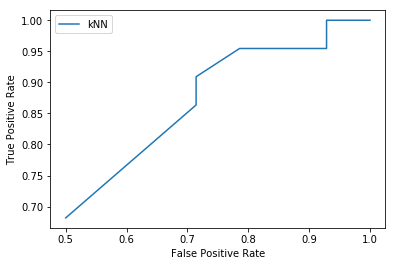

In [449]:
plt.plot(np.transpose(rocK)[1],np.transpose(rocK)[0],label='kNN')
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend()

In [450]:
roc_score(rocK)

0.43993506493506496